In [ ]:
%load_ext autoreload
%autoreload 2

In [7]:
import os
import os.path as op
import glob
import nibabel as nb
import numpy as np
import pandas as pd
import h5py

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import urllib.request, zipfile
from pycocotools.coco import COCO

from nsda import NSDAccess

%matplotlib inline

In [96]:
nsda = NSDAccess('/scratch/2019/visual/nsd/')

In [77]:
betas = nsda.read_betas('subj01', 1, trial_index=[], data_format='fsaverage')

In [78]:
beh = nsda.read_behavior('subj01', 1, trial_index=np.arange(0,200,2))

In [ ]:
imgs = nsda.read_images([569], show=True)

getting annotations from /scratch/2019/visual/nsd/nsddata_stimuli/stimuli/nsd/annotations/captions_val2017.json
annotations file not found
downloading annotations from http://images.cocodataset.org/annotations/annotations_trainval2017.zip
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
A young boy sitting on a bed in a bedroom.
a young boy sitting on a bed with a lamp on beside it
a kid is sitting on a small bed in a room
A little boy sits on a bed with a chair next to it.
The child is waiting for his parents to come in.
getting annotations from /scratch/2019/visual/nsd/nsddata_stimuli/stimuli/nsd/annotations/person_keypoints_val2017.json
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


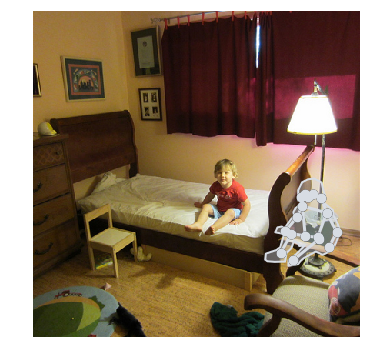

In [97]:
ci = nsda.image_coco_info(569, info_type='captions', show_annot=True)
pi = nsda.image_coco_info(569, info_type='person_keypoints', show_annot=True, show_img=True)

In [18]:
nsda.stim_descriptions

,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,subject2,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,0,...,0,13720,22861,23023,0,0,0,0,0,0
5,475150,val2017,"(0, 0, 0.16640625, 0.16640625)",0.000000,5,False,False,False,0,1,...,0,0,0,0,0,0,0,0,0,0
6,554328,val2017,"(0, 0, 0.11015625, 0.11015625)",0.000000,6,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
7,438269,val2017,"(0.16484375, 0.16484375, 0, 0)",0.000000,7,False,False,False,0,0,...,0,0,0,0,0,0,0,11767,19544,29069
8,8211,val2017,"(0, 0, 0.14140625, 0.14140625)",0.000000,8,False,False,False,0,0,...,22809,0,0,0,0,0,0,0,0,0
9,327701,val2017,"(0, 0, 0.165625, 0.165625)",0.000000,9,False,False,False,0,0,...,0,0,0,0,0,0,0,13481,17352,25765
